# Introducción al Aprendizaje Supervisado - Regresión (Parte I)
* Vista general del Aprendizaje Supervisado
* Entrenamiento y Test de un modelo
* Regresión Lineal


5to año - Ingeniería en Sistemas de Información


Facultad Regional Villa María

"We are drowning in information and starving for knowledge."

                                        –Rutherford D. Roger


## Aprendizaje Supervisado

Vista general:
    
* Dado un conjunto de datos, existen un conjunto de variables llamado predictores (_**features** / inputs / predictors / independent variables_), los cuales pueden ser medidos.

* Los mismos tienen influencia sobre otro conjunto de una o más variables llamadas variables de respuesta (_**response** / outputs / dependent / target variables_).

* El **objetivo** de este tipo de aprendizaje es utilizar las entradas para poder **predecir** los valores de las variables de respuesta, de modo que nuestras predicciones $\hat{Y}$ sean lo más cercana posible a los valores verdaderos de la función $Y$.

* En el aprendizaje supervisado, contamos con un dataset $D = \{(X_1,y_1), (X_2,y_2),..., (X_n,y_n)\}$ compuesto tanto por los features de entrada $X \in \mathbb{R}^D$ como por las salidas $y \in \mathbb{R}$ o bien $y \in \{c_1, c_2, ..., c_n\}$ dependiendo de si se trata de un problema de **regresión** o de **clasificación**, respectivamente.

* Se lo considera como supervisado puesto que el agente que aprende cuenta a priori con ejemplos de comportamiento deseado. Tras **entrenar** con tales ejemplos, el agente aprende a generalizar su conocimiento de tal modo de generar buenas predicciones sobre datos no observados.

* A partir de $D$, se distinguen el subconjunto de **datos de entrenamiento**, utilizados para adaptar el modelo y el subconjunto de **datos de test**, empleados para validar la capacidad de generalización del modelo para salidas no utilizadas en el entrenamiento.

![](img/supervised_workflow.svg)

Algunos ejemplos:

* Predecir el riesgo de una determinada enfermedad.
* Identificar una persona en una fotografía.
* Predecir si un correo es o no spam.
* Predecir el costo de una casa en base a sus características.

El aprendizaje supervisado se divide en dos categorías: regresión y clasificación.

* En problemas de regresión, las salidas son variables continuas y ordenadas. En otras palabras, una predicción $y=14.7$ es mayor que una predicción $y=12.5$ (esto no implica que la primera predicción sea más precisa que la segunda).
* En problemas de clasificación, por su parte, las salidas son variables nominales discretas y no ordenadas. Es decir que si las salidas posibles son "rojo" y "naranja", no es posible asumir un orden entre ellas como "rojo" > "naranja".

Para el aprendizaje supervisado, scikit-learn provee la siguiente interfaz común de métodos

  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.decision_function()` : For classification problems, some estimators provide an uncertainty estimate that is not a probability. For binary classification, a decision_function >= 0 means the positive class will be predicted, while < 0 means the negative class.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit. For classifiers, the `score` method computes the prediction accuracy. For regressors, `score` computes the coefficient of determination (R<sup>2</sup>) of the prediction.
  + `model.transform()` : For feature selection algorithms, this will reduce the dataset to the selected features. For some classification and regression models such as some linear models and random forests, this method reduces the dataset to the most informative features. These classification and regression models can therefore also be used as feature selection methods.

## Regresión Lineal

* Uno de los modelos más simples es el método clásico de **regresión lineal**, en donde utilizamos una línea recta que intentará explicar los datos. En base a un vector de entradas\* $X^T = (X_1, X_2, ..., X_p)$, predecimos una salida $y$ por medio del modelo

$$\hat{Y} = \hat{\beta_0} + \sum_{j=1}^p X_j \hat{\beta_j}$$

donde los parámetros $\hat{\beta_0}, \hat{\beta_1}, \hat{\beta_2}, ..., \hat{\beta_p}$ son estimados con métodos como _Ordinary Least Squares_.

* A continuación se muestra un ejemplo donde aplicaremos regresión lineal.

\* Notar que la notación estándar para referirse a los vectores es como *vectores columna*, por eso se utiliza $X^T$ en lugar de $X$. 

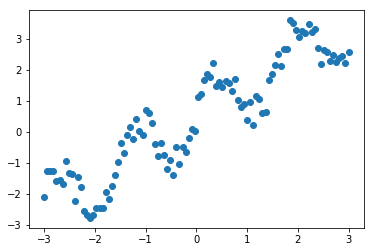

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42) 
# Vamos a generar una función sinusoidal que crece en el tiempo y posee un ruido aleatorio
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
plt.plot(x, y, 'o'); # La visualización gráfica es muy importante para comprender lo que estamos modelando

* scikit-learn nos requiere, para entrenar nuestros modelos de aprendizaje supervisado, que proveamos a $y$ como un array uni-dimensional de numpy, mientras que los ejemplos $X$ deben formar un array bi-dimensional (matriz) de numpy (aún si los mismos consisten solamente en un único feature).

In [2]:
X = x[:, np.newaxis]
X

array([[-3.        ],
       [-2.93939394],
       [-2.87878788],
       [-2.81818182],
       [-2.75757576],
       [-2.6969697 ],
       [-2.63636364],
       [-2.57575758],
       [-2.51515152],
       [-2.45454545],
       [-2.39393939],
       [-2.33333333],
       [-2.27272727],
       [-2.21212121],
       [-2.15151515],
       [-2.09090909],
       [-2.03030303],
       [-1.96969697],
       [-1.90909091],
       [-1.84848485],
       [-1.78787879],
       [-1.72727273],
       [-1.66666667],
       [-1.60606061],
       [-1.54545455],
       [-1.48484848],
       [-1.42424242],
       [-1.36363636],
       [-1.3030303 ],
       [-1.24242424],
       [-1.18181818],
       [-1.12121212],
       [-1.06060606],
       [-1.        ],
       [-0.93939394],
       [-0.87878788],
       [-0.81818182],
       [-0.75757576],
       [-0.6969697 ],
       [-0.63636364],
       [-0.57575758],
       [-0.51515152],
       [-0.45454545],
       [-0.39393939],
       [-0.33333333],
       [-0

In [3]:
# comenzamos por dividir nuestro dataset en subconjuntos de entrenamiento (70%) y test (30%)

X_train = X[0:70]
X_test = X[70:100]
y_train = y[0:70]
y_test = y[70:100]

In [4]:
np.shape(X_train)

(70, 1)

![](img/train_test_split.svg)

In [5]:
# A continuación, utilizamos el algoritmo de aprendizaje utilizado en LinearRegression para adaptar el modelo
# de regresión a los datos de entrenamiento.

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# Tras adaptar el modelo a los datos, acabamos de obtener el siguiente modelo de regresión lineal
# con los presentes valores

print('Weight coefficients (beta_1): ', regressor.coef_)
print('y-axis intercept (beta_0): ', regressor.intercept_)

Weight coefficients (beta_1):  [ 0.90686278]
y-axis intercept (beta_0):  0.428113169416


* Dado que nuestro modelo de regresión es linear, la relación entre la variable de respuesta $y$ y la variable de entrada $x$ se define como

$$y \approx weight \times x + \text{intercept}$$

Teniendo en cuenta los valores mínimos y máximos del dataset, podemos ver gráficamente cómo se ajusta el modelo a nuestros datos de entrenamiento:

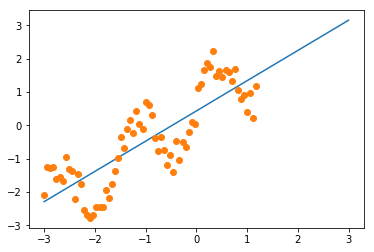

In [13]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o')

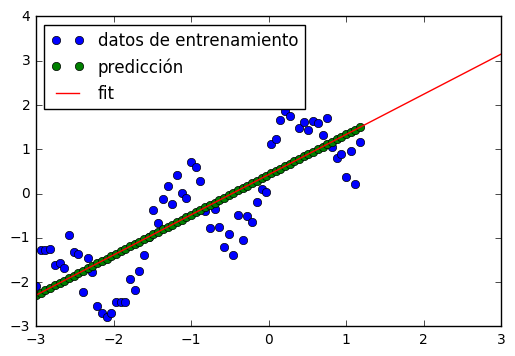

In [8]:
# Vemos la predicción que realiza sobre el conjunto de datos de entrenamiento; esto muestra las limitaciones del modelo.

y_pred_train = regressor.predict(X_train)
plt.plot(X_train, y_train, 'o', label="datos de entrenamiento")
plt.plot(X_train, y_pred_train, 'o', label="predicción")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

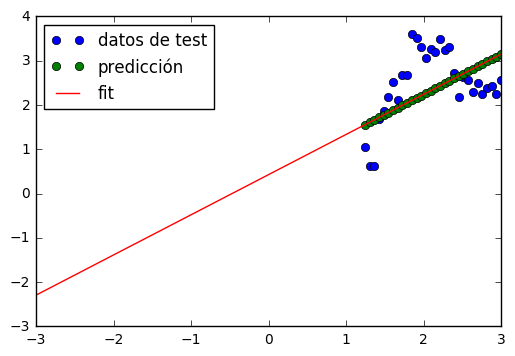

In [9]:
# Vemos el resultado de esta misma predicción sobre el conjunto de datos de test:

y_pred_test = regressor.predict(X_test)
plt.plot(X_test, y_test, 'o', label="datos de test")
plt.plot(X_test, y_pred_test, 'o', label="predicción")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best');

¿Cómo evaluar cuantitativamente los resultados?

* scikit-learn, mediante el método ``score``, permite obtener una medida de cuán buena es la predicción. Para ello, la medida más utilizada es el *Error Cuadrático Medio* (MSE), dado por

$$MSE = \frac{1}{n} \sum^{n}_{i=1} (\text{predicted}_i - \text{true}_i)^2$$

* Alternativamente, otra medida utilizada es el *Coeficiente de Determinación*, dado por

$$R^2 = 1 - \frac{u}{v}$$

donde $u$ es la suma cuadrática de la regresión, $u=\sum (y - \hat{y})^2$, mientras que $v$ es la suma cuadrática residual dada por $v = \sum (y - \bar{y})^2$, donde $\bar{y}$ es el promedio de los $y$ observados. El mejor valor posible para $R^2$ es 1, pudiendo tomar el valor de 0 (por ejemplo, para un modelo que siempre prediga $\bar{y}$) o incluso valores negativos.

In [15]:
# Veamos los resultados en R**2:

regressor.score(X_test, y_test)

0.056555325479235696

In [13]:
# Veamos el error cuadrático medio:

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_test)

0.55257593394489379

## Ejercicios de práctica

Teniendo la función

$$f(x) = 0.01x + (\sin(x)^2) \times (\sin(4x)^2) \times (0.5\phi(x))$$

donde $\phi$ es la función de densidad de probabilidad normal estándar evaluada en $x$.

1. Implementar $f(x)$.
2. Obtener 500 muestras de la función $f(x)$ en el intervalo de $x=[-3 \leq x \leq 3]$.
3. Teniendo dichas muestras, graficar $f(x)$ en el intervalo de $x=[-3 \leq x \leq 3]$.
4. Dividir el conjunto total $(x,f(x))$ en un subconjunto de entrenamiento del 70% de las muestras y un subconjunto de test del 30% de las muestras.
5. Usar el subconjunto de entrenamiento para entrenar un modelo de regresión lineal para aproximar $f(x)$ en el mencionado intervalo.
6. Mostrar gráficamente la regresión para el conjunto de entrenamiento y para el conjunto de test.
7. Imprimir el error cuadrático medio para las predicciones sobre los $X$ de entrenamiento y los $X$ de test.


Nota: estos ejercicios se encuentran en el material extra, es decir que están como práctica por fuera de los requerimientos de la materia.